# <font color ='red'>Logistic reggression model for German credit data.</font>
## <font color ='blue' >This report is presented to you by Samar Saleh as a final report for statistics course.</font>
## <font color ='red' >Students:</font>
<font color ='blue'>Samar Khaled Saleh.</br>220223809</font>

## <font color ='red' >Supervisors:</font>
<font color='blue'>Dr. Samah Hammuda</font>

## In this report we'll analyze and model the German Credit Risk dataset using python language.

# <font color ='red' >DataSet:</font>
- German Credit Dataset is a publicly available UCI Machine Learning Repository dataset. In this dataset, Prof. Hofmann prepared a set of 1000 entries with 20 categorical features. Based on a set of features, each entry represents a customer and is classified as a good or bad credit risk.
- you may dowload the file of the dataset used for this project from [Here](https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data)

# <font color ='red' >Refrences:</font>
- [Importing the necessary libraries](#import_libraries)
- [Importing the dataset](#import_dataset)
- [Information about data variable types](#info)
- [relationships between variables](#relations)
- [Dividing Data into Features and Labels](#dividing)
- [Converting Categorical Data to Numbers](#converting)
- [Calculating the measure of central tendency](#wopreprocessing)
    - [Describing some of the columns](#dividingwopreprocessing)
    - [Describing all the columns](#modelwopreprocessing)
- [Modeling the Dataset](#wpreprocessing)
    - [Target Variable distribution](#scaling)
    - [Age Distribution](#dividingwscaling)
    - [Housing Distribution](#modelwscaling)
- [Checking the sckewness of the continuous variables](#scalingwopreprocessing)
    - [Distribution of the continuous variables](#cvwscaling)

### <font color='brown'>Importing the necessary libraries:</font><a id='import_libraries'></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.model_selection import cross_val_score,StratifiedKFold
from itertools import cycle
from scipy.stats import skew

### <font color='brown'>Importing the dataset:</font><a id='import_dataset'></a>

In [2]:
dataset = pd.read_csv('german.data.txt',header = None,delim_whitespace = True)
dataset.columns = ['checking_account', 'Duration/month', 'Credit_history', 'Purpose', 'Credit_amount', 'Savings_acc/bonds',
                   'employment_since', 'Installment_rate', 'status_and_sex', 'guarantor', 'residence', 'Property',
                   'Age', 'nstallment_plans', 'Housing', 'existing_credits', 'Job', 'ppl_provide_maintenance', 'Telephone',
                   'foreign_worker', 'creditRisk']
dataset.head()

,checking_account,Duration/month,Credit_history,Purpose,Credit_amount,Savings_acc/bonds,employment_since,Installment_rate,status_and_sex,guarantor,...,Property,Age,nstallment_plans,Housing,existing_credits,Job,ppl_provide_maintenance,Telephone,foreign_worker,creditRisk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


### <font color='brown'>Information about data variable types:</font><a id='info'></a>

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   checking_account         1000 non-null   object
 1   Duration/month           1000 non-null   int64 
 2   Credit_history           1000 non-null   object
 3   Purpose                  1000 non-null   object
 4   Credit_amount            1000 non-null   int64 
 5   Savings_acc/bonds        1000 non-null   object
 6   employment_since         1000 non-null   object
 7   Installment_rate         1000 non-null   int64 
 8   status_and_sex           1000 non-null   object
 9   guarantor                1000 non-null   object
 10  residence                1000 non-null   int64 
 11  Property                 1000 non-null   object
 12  Age                      1000 non-null   int64 
 13  nstallment_plans         1000 non-null   object
 14  Housing                  1000 non-null   

### <font color='red'>According to the results of the information about data variable types:</font><a id='relations'></a>
    1- We have 13 categorial columns and 8 numerical columns.
    2- There are no missing values in any of the columns.

### <font color='brown'>Plotting relationships between variables:</font><a id='relations'></a>

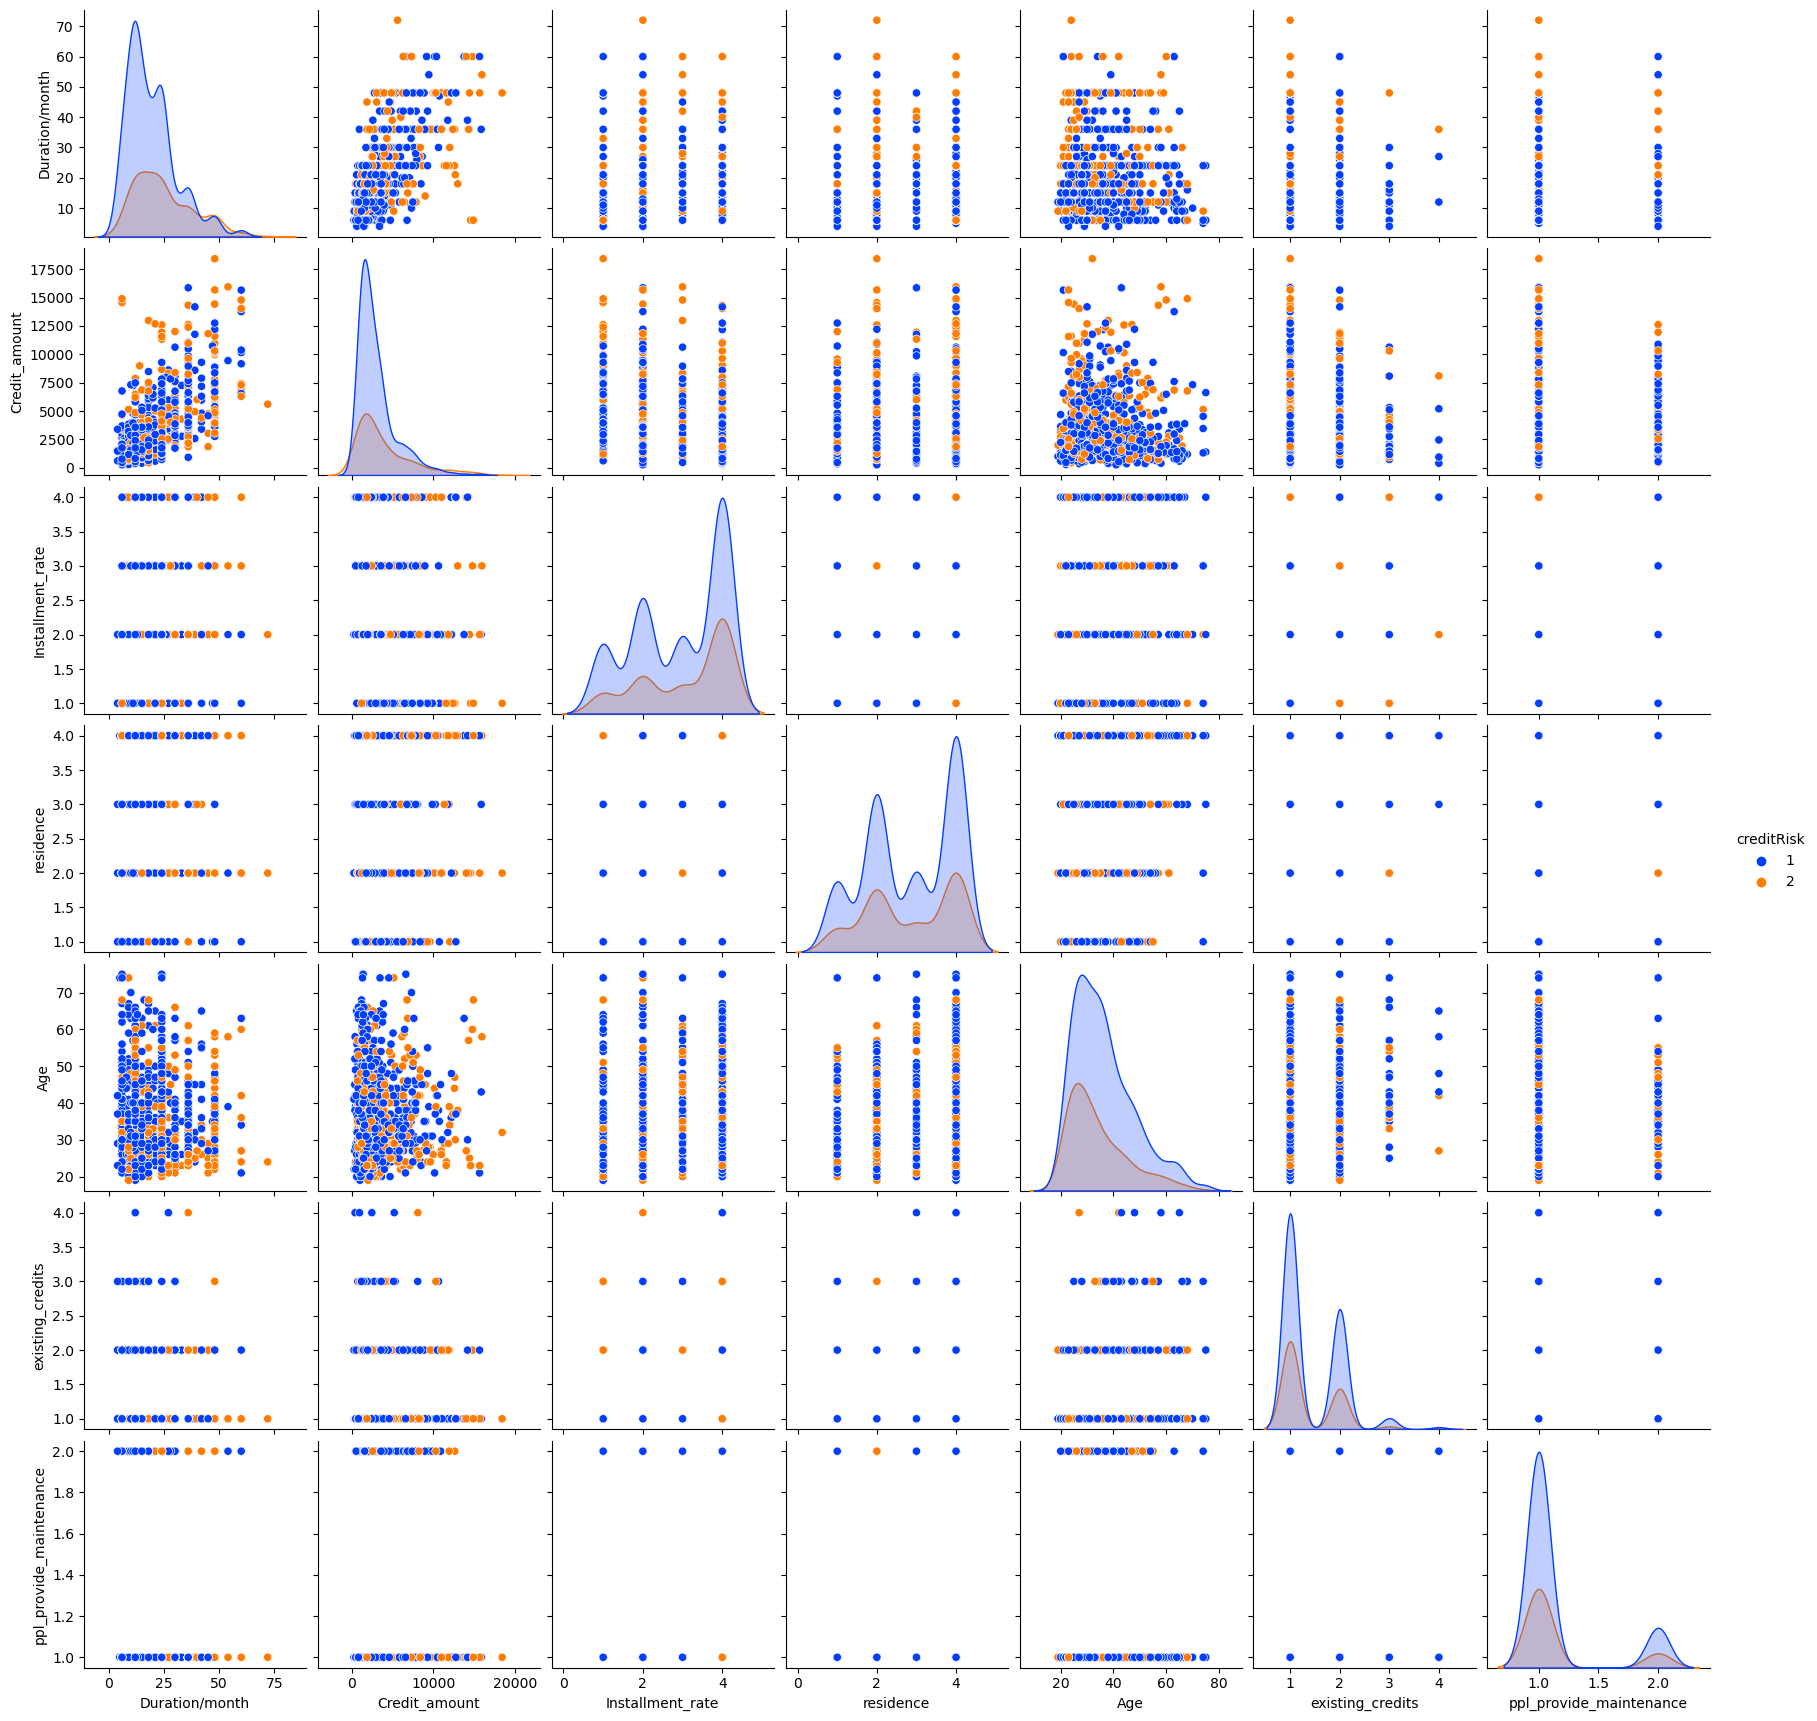

In [4]:
sn.pairplot(dataset, hue='creditRisk', palette='bright')
plt.show()

### <font color='brown'>Dividing Data into Features and Labels:</font><a id='dividing'></a>

In [9]:
X = list(dataset.columns)
X.remove("creditRisk")
Y = dataset.creditRisk-1

In [10]:
dataset[X].head()

,checking_account,Duration/month,Credit_history,Purpose,Credit_amount,Savings_acc/bonds,employment_since,Installment_rate,status_and_sex,guarantor,residence,Property,Age,nstallment_plans,Housing,existing_credits,Job,ppl_provide_maintenance,Telephone,foreign_worker
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


In [11]:
Y.head()

0    0
1    1
2    0
3    0
4    1
Name: creditRisk, dtype: int64

### <font color='brown'>Converting Categorical Data to Numbers:</font><a id='converting'></a>

In [12]:
X= pd.get_dummies(dataset[X],drop_first =True)
X

,Duration/month,Credit_amount,Installment_rate,residence,Age,existing_credits,ppl_provide_maintenance,checking_account_A12,checking_account_A13,checking_account_A14,...,Property_A124,nstallment_plans_A142,nstallment_plans_A143,Housing_A152,Housing_A153,Job_A172,Job_A173,Job_A174,Telephone_A192,foreign_worker_A202
0,6,1169,4,4,67,2,1,0,0,0,...,0,0,1,1,0,0,1,0,1,0
1,48,5951,2,2,22,1,1,1,0,0,...,0,0,1,1,0,0,1,0,0,0
2,12,2096,2,3,49,1,2,0,0,1,...,0,0,1,1,0,1,0,0,0,0
3,42,7882,2,4,45,1,2,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,24,4870,3,4,53,2,2,0,0,0,...,1,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,0,0,1,...,0,0,1,1,0,1,0,0,0,0
996,30,3857,4,4,40,1,1,0,0,0,...,0,0,1,1,0,0,0,1,1,0
997,12,804,4,4,38,1,1,0,0,1,...,0,0,1,1,0,0,1,0,0,0
998,45,1845,4,4,23,1,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0


# <font color='darkorange'>Calculating the measures of central tendency:</font><a id='wopreprocessing'></a>

### <font color='brown'>Describing some of the columns:</font><a id='dividingwopreprocessing'></a>

In [13]:
dataset['Credit_amount'].describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: Credit_amount, dtype: float64

### <font color='brown'>Describing all the columns:</font><a id='modelwopreprocessing'></a>

In [14]:
dataset.describe()

,Duration/month,Credit_amount,Installment_rate,residence,Age,existing_credits,ppl_provide_maintenance,creditRisk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


# <font color='darkorange'>Modeling the Dataset:</font><a id='wpreprocessing'></a>

### <font color='brown'>Target Variable distribution:</font><a id='scaling'></a>

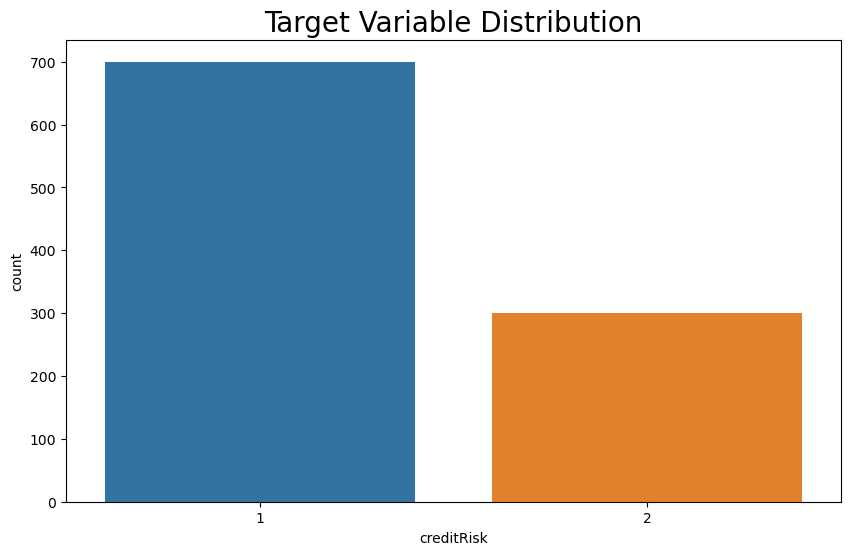

In [15]:
plt.figure(figsize=(10, 6))
sn.countplot(data=dataset, x="creditRisk")
plt.title("Target Variable Distribution", fontsize=20)
plt.show()

#### - There are 700 instances where an applicant was classified as good
#### - There are 300 instances where an applicant was classified as bad

### <font color='brown'>Age Distribution:</font><a id='dividingwscaling'></a>

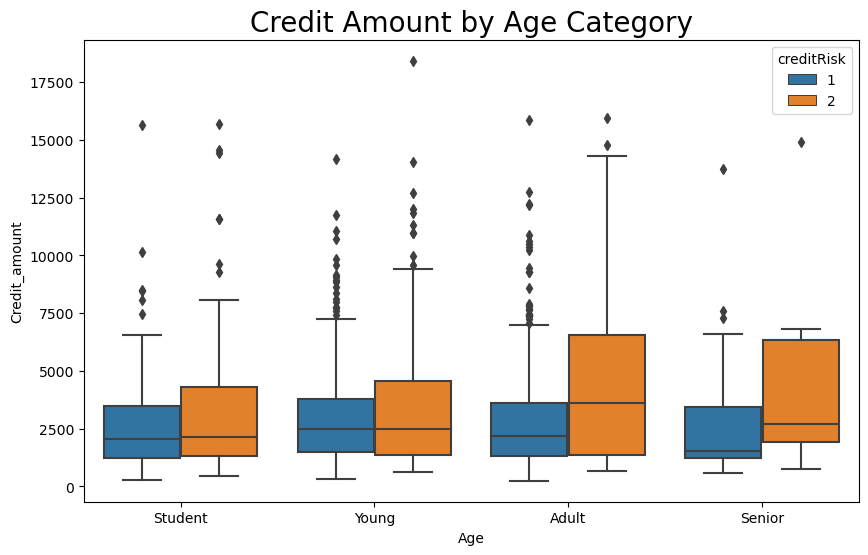

In [16]:
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
dataset["Age"] = pd.cut(dataset.Age, interval, labels=cats)

plt.figure(figsize=(10, 6))
plt.title("Credit Amount by Age Category", fontsize=20)
sn.boxplot(data=dataset, x='Age', y='Credit_amount', hue='creditRisk')
plt.show()

### <font color='brown'>Housing Distribution:</font><a id='modelwscaling'></a>

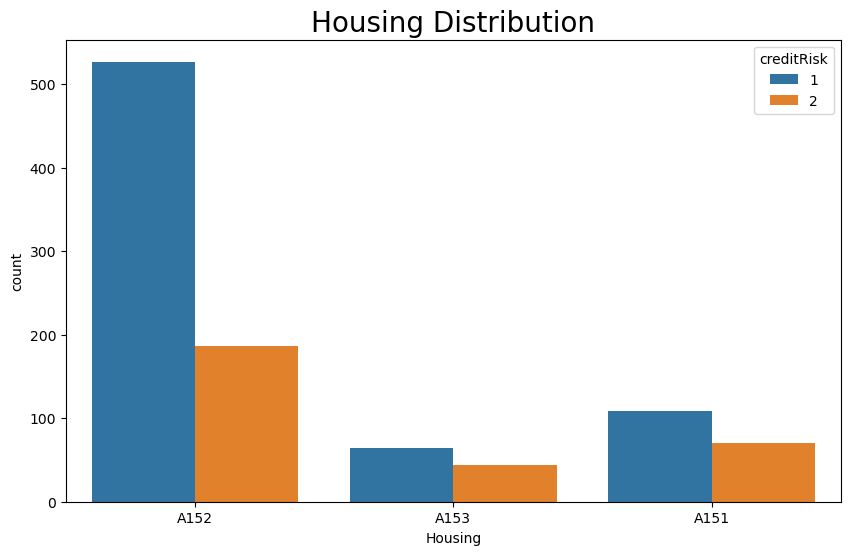

In [17]:
plt.figure(figsize=(10, 6))
sn.countplot(data=dataset, x='Housing', hue='creditRisk')
plt.title("Housing Distribution", fontsize=20)
plt.show()

# <font color='darkorange'>Checking the sckewness of the continuous variables:</font><a id='scalingwopreprocessing'></a>

### <font color='brown'>Distribution of the continuous variables:</font><a id='cvwscaling'></a>

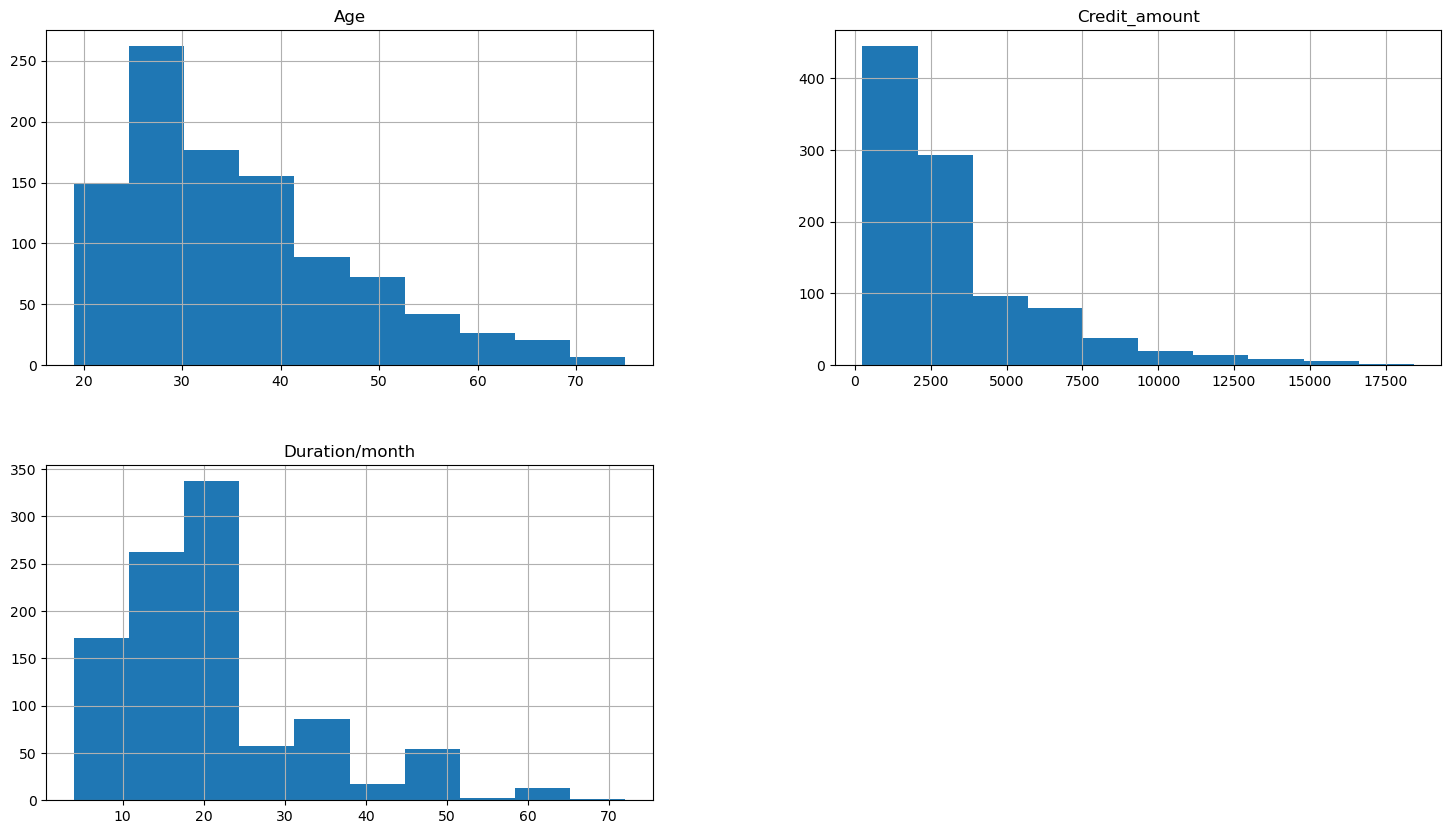

In [25]:
X.hist(['Age', 'Credit_amount','Duration/month'], figsize=(18,10))
plt.show()

### <font color='red'>All the three variables show marked positive skewness.</font><a id='cvwscaling1'></a>

### This is the end of our report...